In [6]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from sodapy import Socrata


client = Socrata("data.cityofnewyork.us", None)
results = client.get("43nn-pn8j", limit=20000)
results_df = pd.DataFrame.from_records(results)
results_df.count()

action                   20000
boro                     20000
building                 19958
camis                    20000
critical_flag            20000
cuisine_description      20000
dba                      20000
grade                    10522
grade_date               10522
inspection_date          20000
inspection_type          20000
phone                    20000
record_date              20000
score                    19242
street                   20000
violation_code           19762
violation_description    19672
zipcode                  19579
dtype: int64

In [7]:
results_df.to_csv('Outputs/smallpractice_data.csv', index=True)

# Step 1: Drop useless columns 

In [8]:
results_df.columns

Index(['action', 'boro', 'building', 'camis', 'critical_flag',
       'cuisine_description', 'dba', 'grade', 'grade_date', 'inspection_date',
       'inspection_type', 'phone', 'record_date', 'score', 'street',
       'violation_code', 'violation_description', 'zipcode'],
      dtype='object')

In [9]:
newresultsdf= results_df.drop(columns=['camis','building','grade_date','violation_description'])

In [10]:
newresults2 = newresultsdf.drop(columns=['inspection_type','phone','record_date','score','violation_code','street'])

In [11]:
newresults2.to_csv('Outputs/small_practice_cleaned_data.csv', index=True)
newresults2.head()

newresults2.columns

Index(['action', 'boro', 'critical_flag', 'cuisine_description', 'dba',
       'grade', 'inspection_date', 'zipcode'],
      dtype='object')

In [12]:
#clean data: change column headings, add index, fix timestamp to YYMMDD, Add Inspection Bins per year
#combine cuisines if desired?


In [13]:
# Bar Graph 1: count of most popular restaurants names
# groupby dba, bargraph with top 10 counted restaurant names
# delete null values in restaurant names

In [14]:
countboro = newresults2["boro"].value_counts()
countboro

MANHATTAN        10170
QUEENS            4130
BROOKLYN          3282
BRONX             1299
STATEN ISLAND     1119
Name: boro, dtype: int64

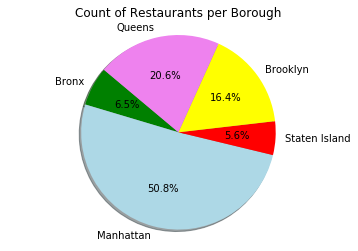

<Figure size 432x288 with 0 Axes>

In [15]:
# BarGraph 2: count of restaurants per borough
# delete restaurants that don't have an assigned borough

labels = "Bronx","Manhattan","Staten Island","Brooklyn","Queens"
sizes = [1299, 10170, 1119, 3282, 4130]
colors = ["green","lightblue","red","yellow","violet"]
explode = (0, 0, 0, 0,0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Count of Restaurants per Borough")
plt.axis('equal')
plt.show()

plt.savefig('Count_restaurants.png') 

In [16]:
cusinecount = newresults2["cuisine_description"].value_counts()
cusinecount

American                                                            6512
Italian                                                             2139
Pizza                                                               1158
Bakery                                                               802
Pizza/Italian                                                        762
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     682
Hamburgers                                                           670
Irish                                                                625
French                                                               544
Jewish/Kosher                                                        544
Chinese                                                              495
Mexican                                                              466
Japanese                                                             416
CafÃ©/Coffee/Tea                                   

NameError: name 'grade' is not defined

In [31]:
data =  newresults2.dropna(subset=['grade'])
cuisinedrop= newresults2.dropna(subset=['cuisine_description'])

initial_data = data

df = pd.DataFrame(initial_data, columns = ['action', 'boro', 'critical_flag', 
                                           'cuisine_description', 'dba','grade','inspection_date', 'zipcode'])

result = [] 
for value in df["grade"]: 
    if value == "A" : 
        result.append("6") 
    elif value == "B": 
        result.append("4")
    elif value == "C": 
        result.append("2")
    elif value == "G": 
        result.append("0")
    elif value == "P": 
        result.append("0")
    elif value == "Z": 
        result.append("0")
    elif value == "Not Yet Graded": 
        result.append("0")
    else: 
        result.append("Fail") 
       
df["Result"] = result    


In [32]:
df["Result"]

5        6
6        6
7        6
8        6
9        6
10       6
11       6
12       6
13       6
14       6
15       6
16       6
18       6
19       6
25       6
26       6
27       6
28       6
32       6
33       6
34       6
35       6
36       6
39       6
40       6
41       6
42       6
46       6
47       6
48       6
        ..
19930    6
19931    6
19937    6
19938    6
19944    6
19945    6
19949    6
19950    6
19951    6
19952    6
19953    0
19954    0
19955    0
19956    0
19957    0
19958    0
19963    4
19964    4
19965    4
19966    4
19973    6
19974    6
19975    6
19981    4
19982    4
19983    4
19995    4
19996    4
19997    4
19998    4
Name: Result, Length: 10522, dtype: object

ValueError: shape mismatch: objects cannot be broadcast to a single shape

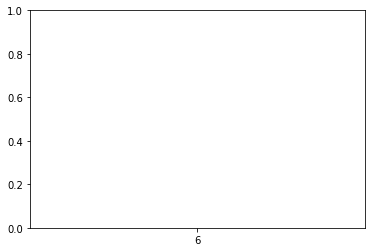

In [33]:
# Graph 4: bar Y= grades, x = cuisines
# cusines + grade

objects = newresults2['cuisine_description']
y_pos = np.arange(len(objects))
performance = df["Result"]

plt.barh(y_pos, performance, align='center', alpha=0.5) 

In [ ]:
# Graph 4b: bar Y= closures, x = cuisines
# count of closures by cuisine. Label points.

In [ ]:
# Graph 5: heatmap of inspections per zipcode
# delete entries without inspections or zipcodes

In [ ]:
# Graph 6: Bargraph of closures and reclosures by borough
# count closures, count reclosures, group by borough

In [ ]:
# Graph 6b: heatmap of re/closures by zipcode
# restates graph 6

In [ ]:
# Graph 7: heatmap of critical violations by zipcode or scatterplot by cuisine
# describes which areas or cuisines are the most dangerous, as critical violations led foodborne illness

In [ ]:
# Graph 8: heatmap of grades by zipcode or scatterplot by cuisine
# describes best and worst zipcodes, shows good/bad restaurants by cuisine

In [ ]:
#Graph 9: bargraph showing inspections per year, closures per year
data =  newresults2.dropna(subset=['grade'])


In [ ]:
# Analysis??? Opportunities for Regressions, chi-squares?